In [52]:
# Basic imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# For handling missing values
from sklearn.impute import SimpleImputer

# For encoding categorical variables
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

# For scaling and normalizing features
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# For splitting the data
from sklearn.model_selection import train_test_split

# For hyperparameter tuning
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# For evaluating the model
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve

from sklearn.decomposition import PCA

# XGBoost classifier
import xgboost as xgb

from sklearn.ensemble import RandomForestClassifier

# from imblearn.over_sampling import SMOTE
# from imblearn.under_sampling import RandomUnderSampler
# from imblearn.pipeline import Pipeline

# For handling warnings
import warnings
warnings.filterwarnings('ignore')

# For displaying all columns in the DataFrame
pd.set_option('display.max_columns', None)

In [53]:
train = pd.read_csv('/Users/blairjdaniel/lighthouse/lighthouse/week_nine/predict-student-performance-from-game-play/train.csv')
test = pd.read_csv('/Users/blairjdaniel/lighthouse/lighthouse/week_nine/predict-student-performance-from-game-play/test.csv')
train_labels = pd.read_csv('/Users/blairjdaniel/lighthouse/lighthouse/week_nine/predict-student-performance-from-game-play/train_labels.csv')


In [54]:
train_labels['session'] = train_labels.session_id.apply(lambda x: int(x.split('_')[0]) )
train_labels['q'] = train_labels.session_id.apply(lambda x: int(x.split('_')[-1][1:]) )

In [55]:
train.head()


,session_id,index,elapsed_time,event_name,name,level,page,room_coor_x,room_coor_y,screen_coor_x,screen_coor_y,hover_duration,text,fqid,room_fqid,text_fqid,fullscreen,hq,music,level_group
0,20090312431273200,0,0,cutscene_click,basic,0,NaN,-413.991405,-159.314686,380.0,494.0,NaN,undefined,intro,tunic.historicalsociety.closet,tunic.historicalsociety.closet.intro,0,0,1,0-4
1,20090312431273200,1,1323,person_click,basic,0,NaN,-413.991405,-159.314686,380.0,494.0,NaN,"Whatcha doing over there, Jo?",gramps,tunic.historicalsociety.closet,tunic.historicalsociety.closet.gramps.intro_0_...,0,0,1,0-4
2,20090312431273200,2,831,person_click,basic,0,NaN,-413.991405,-159.314686,380.0,494.0,NaN,Just talking to Teddy.,gramps,tunic.historicalsociety.closet,tunic.historicalsociety.closet.gramps.intro_0_...,0,0,1,0-4
3,20090312431273200,3,1147,person_click,basic,0,NaN,-413.991405,-159.314686,380.0,494.0,NaN,I gotta run to my meeting!,gramps,tunic.historicalsociety.closet,tunic.historicalsociety.closet.gramps.intro_0_...,0,0,1,0-4
4,20090312431273200,4,1863,person_click,basic,0,NaN,-412.991405,-159.314686,381.0,494.0,NaN,"Can I come, Gramps?",gramps,tunic.historicalsociety.closet,tunic.historicalsociety.closet.gramps.intro_0_...,0,0,1,0-4


In [56]:
# Display the first 5 examples
train_labels.head(5)

,session_id,correct,session,q
0,20090312431273200_q1,1,20090312431273200,1
1,20090312433251036_q1,0,20090312433251036,1
2,20090312455206810_q1,1,20090312455206810,1
3,20090313091715820_q1,0,20090313091715820,1
4,20090313571836404_q1,1,20090313571836404,1


In [57]:
df_merged = pd.merge(train, train_labels, left_on = ['session_id', 'index'], right_on = ['session', 'q'] )
len(df_merged)

423747

<Axes: xlabel='correct'>

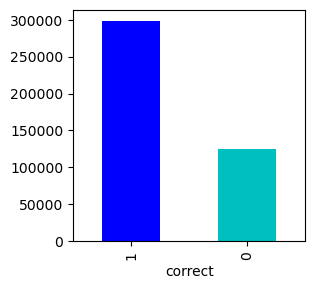

In [58]:
plt.figure(figsize=(3, 3))
plot_df = df_merged.correct.value_counts()
plot_df.plot(kind="bar", color=['b', 'c'])

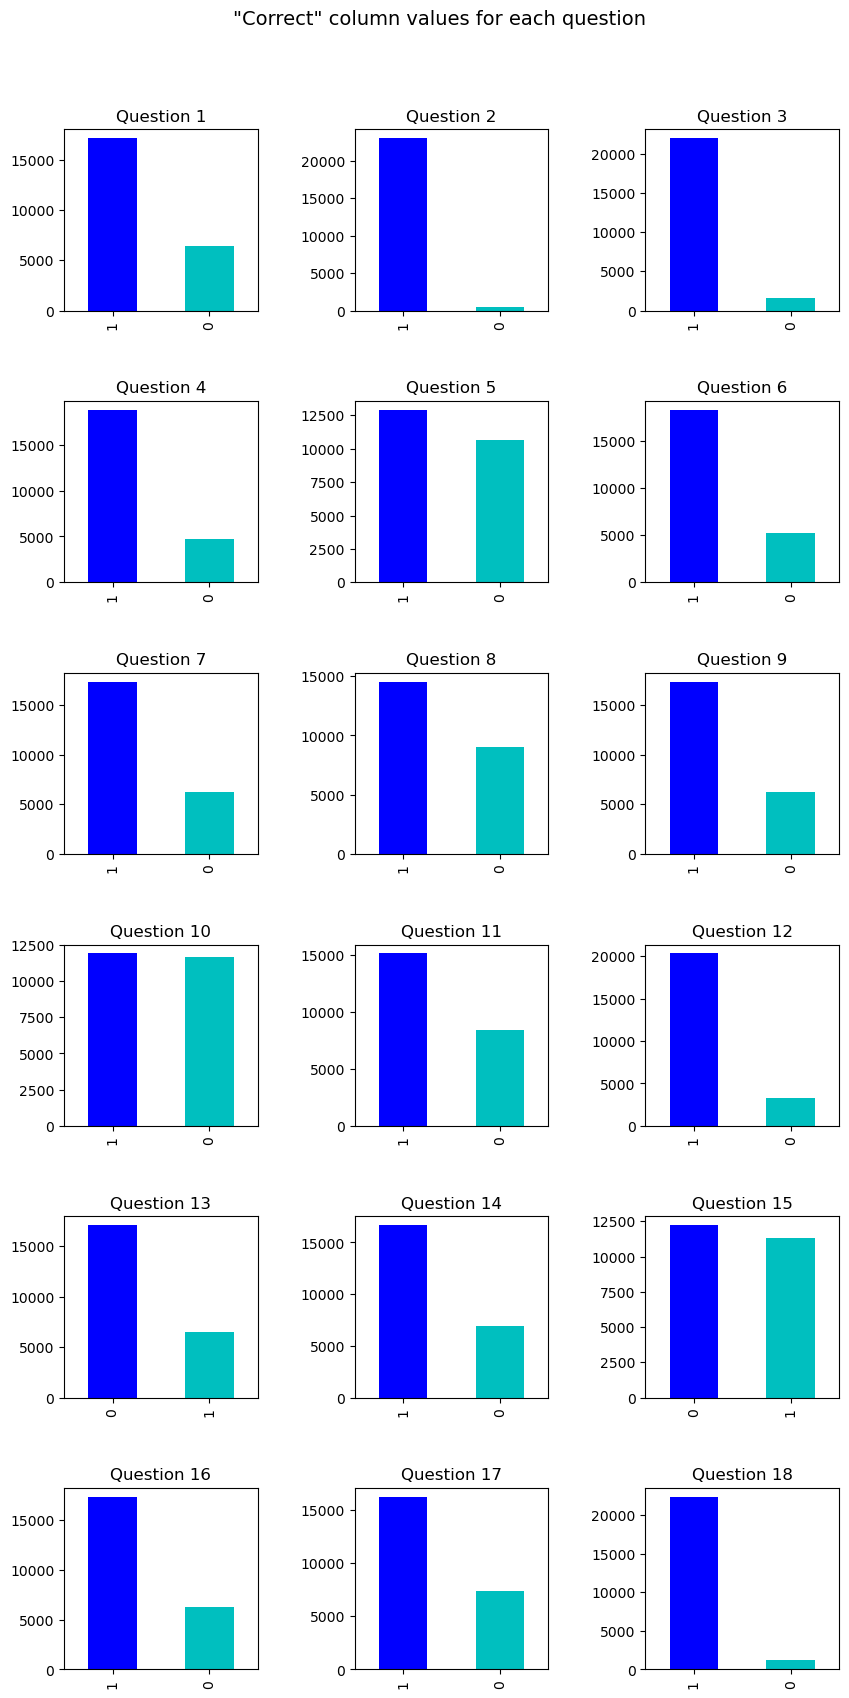

In [59]:
plt.figure(figsize=(10, 20))
plt.subplots_adjust(hspace=0.5, wspace=0.5)
plt.suptitle("\"Correct\" column values for each question", fontsize=14, y=0.94)
for n in range(1,19):
    #print(n, str(n))
    ax = plt.subplot(6, 3, n)

    # filter df and plot ticker on the new subplot axis
    plot_df = train_labels.loc[train_labels.q == n]
    plot_df = plot_df.correct.value_counts()
    plot_df.plot(ax=ax, kind="bar", color=['b', 'c'])
    
    # chart formatting
    ax.set_title("Question " + str(n))
    ax.set_xlabel("")

In [60]:
# CATEGORICAL = ['event_name', 'name','fqid', 'room_fqid', 'text_fqid']
# NUMERICAL = ['elapsed_time','level','page','room_coor_x', 'room_coor_y', 
#         'screen_coor_x', 'screen_coor_y', 'hover_duration']

In [61]:
# # Reference: https://www.kaggle.com/code/cdeotte/random-forest-baseline-0-664/notebook

# def feature_engineer(dataset_df):
#     dfs = []
#     for c in CATEGORICAL:
#         tmp = dataset_df.groupby(['session_id','level_group'])[c].agg('nunique')
#         tmp.name = tmp.name + '_nunique'
#         dfs.append(tmp)
#     for c in NUMERICAL:
#         tmp = dataset_df.groupby(['session_id','level_group'])[c].agg('mean')
#         dfs.append(tmp)
#     for c in NUMERICAL:
#         tmp = dataset_df.groupby(['session_id','level_group'])[c].agg('std')
#         tmp.name = tmp.name + '_std'
#         dfs.append(tmp)
#     dataset_df = pd.concat(dfs,axis=1)
#     dataset_df = dataset_df.fillna(-1)
#     dataset_df = dataset_df.reset_index()
#     dataset_df = dataset_df.set_index('session_id')
#     return dataset_df

In [62]:
# dataset_df = feature_engineer(train)
# print("Full prepared dataset shape is {}".format(dataset_df.shape))

In [ ]:
# # Define the mapping
# level_group_mapping = {
#     '0-4': 1,
#     '5-12': 2,
#     '13-22': 3,
# }

# # Apply the mapping to the level_group column
# train['level_group_int'] = train['level_group'].map(level_group_mapping)
# train = train.drop(columns=['level_group'])


In [ ]:
# # Compute the correlation matrix
# corr_matrix = train.corr()

# # Plot the heatmap
# plt.figure(figsize=(12, 8))
# sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
# plt.title('Correlation Map')
# plt.show()



ValueError: could not convert string to float: 'cutscene_click'

In [65]:
# Separate numeric and categorical columns
numeric_cols = df_merged.select_dtypes(include=[np.number]).columns
categorical_cols = df_merged.select_dtypes(exclude=[np.number]).columns

# Handle missing values for numeric columns
numeric_imputer = SimpleImputer(strategy='median')
df_merged[numeric_cols] = numeric_imputer.fit_transform(df_merged[numeric_cols])

# Handle missing values for categorical columns
categorical_imputer = SimpleImputer(strategy='most_frequent')
df_merged[categorical_cols] = categorical_imputer.fit_transform(df_merged[categorical_cols])

# Encode categorical variables
label_encoders = {}
for col in categorical_cols:
    label_encoders[col] = LabelEncoder()
    df_merged[col] = label_encoders[col].fit_transform(df_merged[col])


In [66]:
X = df_merged
y = df_merged['correct']  # Replace 'correct' with the actual correct column name


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [67]:
# Scale the features
scaler = StandardScaler()
dataset_scaled = scaler.fit_transform(df_merged)


In [68]:
# Apply PCA
pca = PCA(n_components=10)  # Adjust the number of components as needed
pca_result = pca.fit_transform(dataset_scaled)

# Convert the PCA result back to DataFrame
pca_df = pd.DataFrame(pca_result, columns=[f'PC{i+1}' for i in range(pca_result.shape[1])])


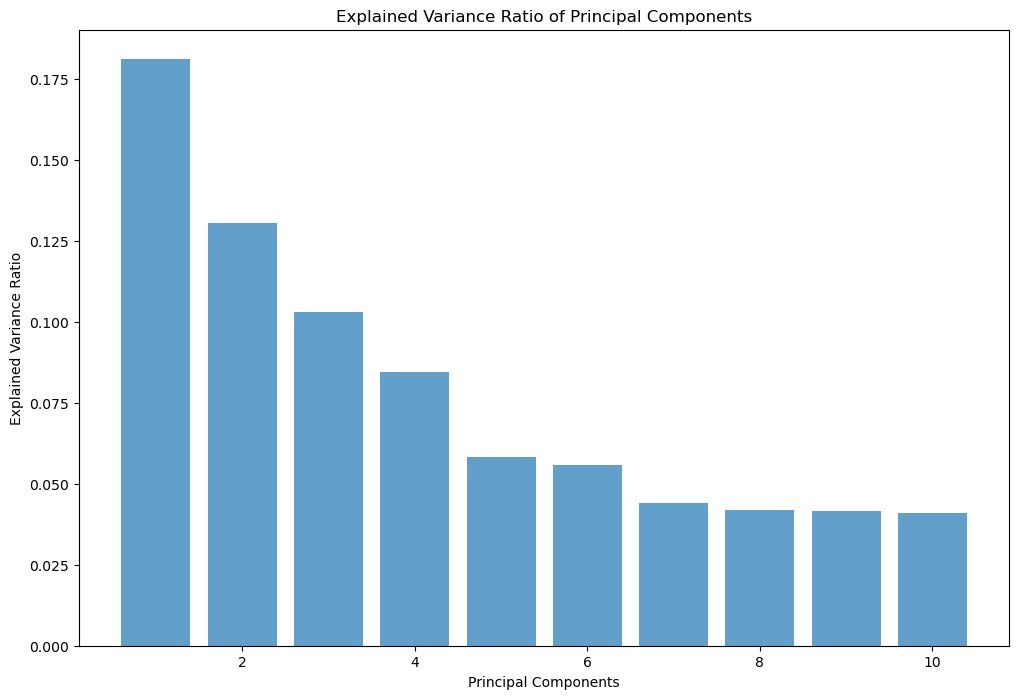

In [69]:
# Plot the explained variance ratio
plt.figure(figsize=(12, 8))
plt.bar(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_, alpha=0.7, align='center')
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratio of Principal Components')
plt.show()

In [70]:
# Define the parameter grid for GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 4, 5],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0]
}

In [71]:
# Calculate the scale_pos_weight
neg_class = len(y_train[y_train == 0])
pos_class = len(y_train[y_train == 1])
scale_pos_weight = neg_class / pos_class

print(f"scale_pos_weight: {scale_pos_weight}")

scale_pos_weight: 0.4184568391982928


In [72]:
# Initialize the XGBoost classifier
xgb_clf = xgb.XGBClassifier(scale_pos_weight=scale_pos_weight, objective='binary:logistic', eval_metric='auc', random_state=42)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=xgb_clf, param_grid=param_grid, cv=3, scoring='accuracy', verbose=1, n_jobs=-1)

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print(f"Best Parameters: {best_params}")
print(f"Best Cross-Validation Score: {best_score}")

Fitting 3 folds for each of 243 candidates, totalling 729 fits
Best Parameters: {'colsample_bytree': 0.8, 'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 50, 'subsample': 0.8}
Best Cross-Validation Score: 1.0


In [73]:
# Train the XGBoost model with the best parameters
best_xgb_clf = xgb.XGBClassifier(**best_params, objective='binary:logistic', random_state=42)
best_xgb_clf.fit(X_train, y_train)

# Make predictions on the test data
y_pred = best_xgb_clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy}")

# Display the classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Display the confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Test Accuracy: 0.9923893805309735
Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      0.97      0.99     24873
         1.0       0.99      1.00      0.99     59877

    accuracy                           0.99     84750
   macro avg       0.99      0.99      0.99     84750
weighted avg       0.99      0.99      0.99     84750

Confusion Matrix:
[[24228   645]
 [    0 59877]]


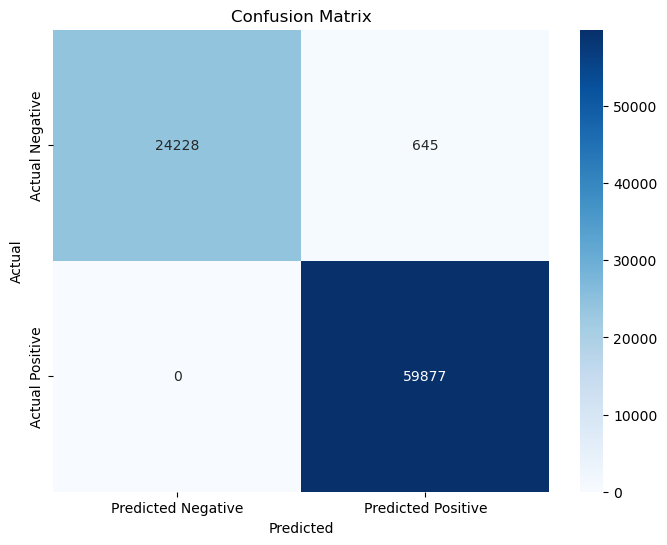

In [74]:
# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)


# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted Negative', 'Predicted Positive'], yticklabels=['Actual Negative', 'Actual Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

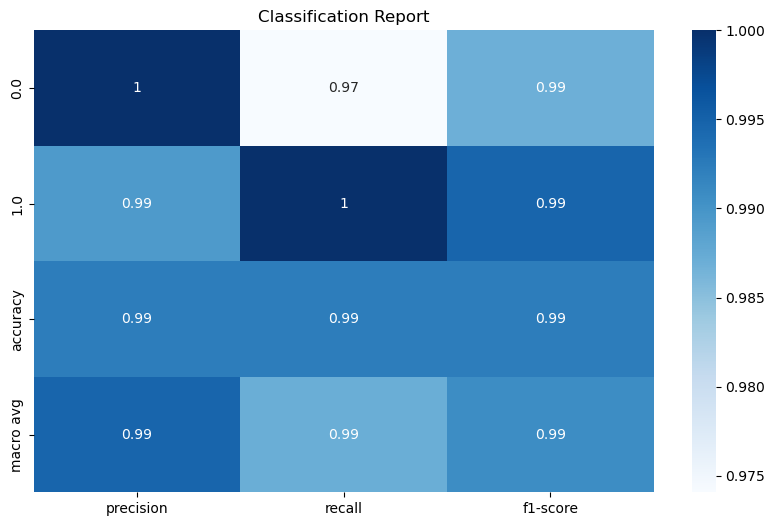

In [75]:
# Generate the classification report
report = classification_report(y_test, y_pred, output_dict=True)

# Convert the classification report to a DataFrame
report_df = pd.DataFrame(report).transpose()

# Plot the classification report
plt.figure(figsize=(10, 6))
sns.heatmap(report_df.iloc[:-1, :-1], annot=True, cmap='Blues')
plt.title('Classification Report')
plt.show()